In [1]:
import enum
dt = 4380

In [2]:
class Parametro(enum.Enum):
    posicion_x = enum.auto()
    posicion_y = enum.auto()
    direccion = enum.auto()
    velocidad_x = enum.auto()
    velocidad_y = enum.auto()
    masa = enum.auto()
    estrella = enum.auto()

In [3]:
class Objeto:
    def __init__(self, estrella):
        self.posicion_x: float = 0
        self.posicion_y: float = 0
        self.velocidad_x: float = 0
        self.velocidad_y: float = 0
        self.masa: float = 0
        self.direccioin: float = 0
        self.estrella = estrella
    
    def variar_parametro(self, parametro: Parametro, valor: float):
        if parametro == Parametro.masa:
            self.masa = valor
        if parametro == Parametro.velocidad_y:
            self.velocidad_y = valor
        if parametro == Parametro.posicion_x:
            self.posicion_x = valor

In [4]:
class Sistema:  
    def __init__(self):
        self.objetos: list = []
        self.Gm: list = []
        self.estrella: list = []
        self.numero_objetos: int = 0
        self.aceleracion_x: list = []
        self.aceleracion_y: list = []

    def Numero_objetos(self): 
        self.numero_objetos = len(self.objetos)

    def agregar_objeto(self, objeto: Objeto):
        self.objetos.append(objeto)
        self.Gm.append(objeto.masa * 6.672 * 10 ** -11)
        self.estrella.append(objeto.estrella)
        self.aceleracion_x.append(0)
        self.aceleracion_y.append(0)
        self.Numero_objetos()

    def Reiniciar_aceleracion(self):
        for i, _ in enumerate(self.objetos):
            self.aceleracion_x[i] = 0
            self.aceleracion_y[i] = 0

In [5]:
masa_sol = 1988500 * 10 ** 24
masa_tierra = 5.97 * 10 ** 24
velocidad_tierra = 29800
distancia_tierra = 149.6 * 10 ** 9

In [134]:
p1 = Objeto(estrella = False)
p1.variar_parametro(Parametro.velocidad_y, velocidad_tierra)
p1.variar_parametro(Parametro.masa, masa_tierra)
p1.variar_parametro(Parametro.posicion_x, distancia_tierra)

p2 = Objeto(estrella = False)
p2.variar_parametro(Parametro.velocidad_y, .75*velocidad_tierra)
p2.variar_parametro(Parametro.masa, 1.5*masa_tierra)
p2.variar_parametro(Parametro.posicion_x, 1.5*distancia_tierra)

p3 = Objeto(estrella = True)
p3.variar_parametro(Parametro.masa, masa_sol)

p4 = Objeto(estrella = True)
p4.variar_parametro(Parametro.masa, 1*masa_sol)
p4.variar_parametro(Parametro.posicion_x, 5*distancia_tierra)
p4.variar_parametro(Parametro.velocidad_y, 0.1*velocidad_tierra)

Sis = Sistema()

In [135]:
Sis.agregar_objeto(p1)
Sis.agregar_objeto(p2)
Sis.agregar_objeto(p3)
Sis.agregar_objeto(p4)

In [136]:
Sis.objetos[3].posicion_y

0

In [137]:
n = Sis.numero_objetos
print(n)

4


In [138]:
REE = True
REP = True
MCeE = False

In [139]:
def calcular_aceleracion(i, j):
    xi, yi = Sis.objetos[i].posicion_x, Sis.objetos[i].posicion_y
    xj, yj = Sis.objetos[j].posicion_x, Sis.objetos[j].posicion_y
    
    x = xj - xi
    y = yj - yi

    distancia_cuadrado = x ** 2 + y ** 2
    distancia = distancia_cuadrado ** 0.5
    distancia_cubo = distancia_cuadrado * distancia

    aceleracion = Sis.Gm[j]/distancia_cubo
    aceleracion_x = aceleracion * x
    aceleracion_y = aceleracion * y
    
    Sis.aceleracion_x[i] += aceleracion_x
    Sis.aceleracion_y[i] += aceleracion_y

    if (not Sis.estrella[i] and Sis.estrella[j] and not MCeE):
        return
    else:
        Sis.aceleracion_x[j] -= x * Sis.Gm[i]/distancia_cubo 
        Sis.aceleracion_y[j] -= y * Sis.Gm[i]/distancia_cubo        


In [140]:
def aplicar_modelo_computacional(i):
    Sis.objetos[i].posicion_x += Sis.objetos[i].velocidad_x *dt
    Sis.objetos[i].velocidad_x += Sis.aceleracion_x[i] *dt
    Sis.objetos[i].posicion_y += Sis.objetos[i].velocidad_y *dt
    Sis.objetos[i].velocidad_y += Sis.aceleracion_y[i] *dt

In [141]:
Sis.objetos[3].velocidad_x

0

In [142]:
p1x = []
p1y = []

p2x = []
p2y = []

p3x = []
p3y = []

p4x = []
p4y = []

for _ in range (7200):
    for i in range(0, n):
        if(Sis.estrella[i]): #si es estrella
            if(MCeE):
                for j in range(i+1, n):
                    if(not (not REE and Sis.estrella[j])):
                        calcular_aceleracion(i, j)
            else:
                continue
        else: #si es planeta
            for j in range(i+1, n):
                if(REP or Sis.estrella[j]):
                    calcular_aceleracion(i, j)
        aplicar_modelo_computacional(i)
    Sis.Reiniciar_aceleracion()
    
    p1x.append(Sis.objetos[0].posicion_x)
    p1y.append(Sis.objetos[0].posicion_y)
    p2x.append(Sis.objetos[1].posicion_x)
    p2y.append(Sis.objetos[1].posicion_y)
    p3x.append(Sis.objetos[2].posicion_x)
    p3y.append(Sis.objetos[2].posicion_y)
    p4x.append(Sis.objetos[3].posicion_x)
    p4y.append(Sis.objetos[3].posicion_y)

In [143]:
import matplotlib.pyplot as plt
import math

<function matplotlib.pyplot.show(close=None, block=None)>

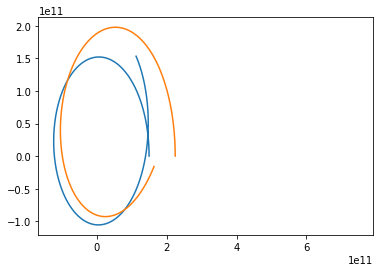

In [144]:
plt.plot(p1x, p1y)
plt.plot(p2x, p2y)
plt.plot(p3x, p3y)
plt.plot(p4x, p4y)
plt.show

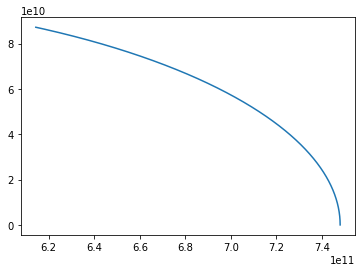

In [111]:
plt.plot(p4x, p4y)
plt.show()